In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('loan_prediction_train.csv')

In [3]:
pd.set_option('display.max_columns', 12)

In [4]:
df.shape

(614, 13)

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,...,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,...,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,...,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,...,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,...,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,...,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Finding the missing values

In [7]:
df.isna().any().any()

True

In [8]:
df.isnull().sum().sum()

149

In [9]:
features_with_na = [feature for feature in df.columns if df[feature].isna().sum() > 1]
for feature in features_with_na:
    print(feature, df[feature].isna().mean().round(4) * 100, '% missing values' )


Gender 2.12 % missing values
Married 0.49 % missing values
Dependents 2.44 % missing values
Self_Employed 5.21 % missing values
LoanAmount 3.58 % missing values
Loan_Amount_Term 2.2800000000000002 % missing values
Credit_History 8.14 % missing values


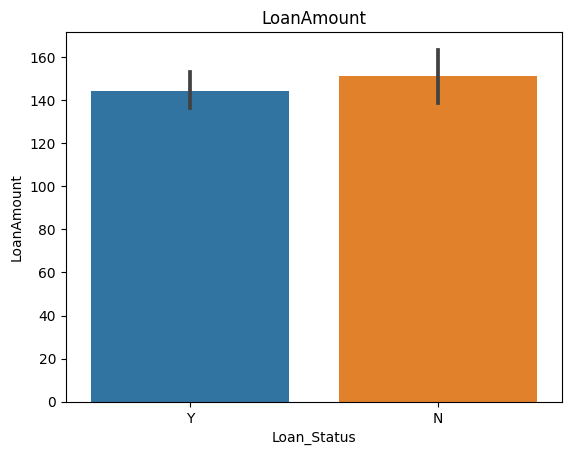

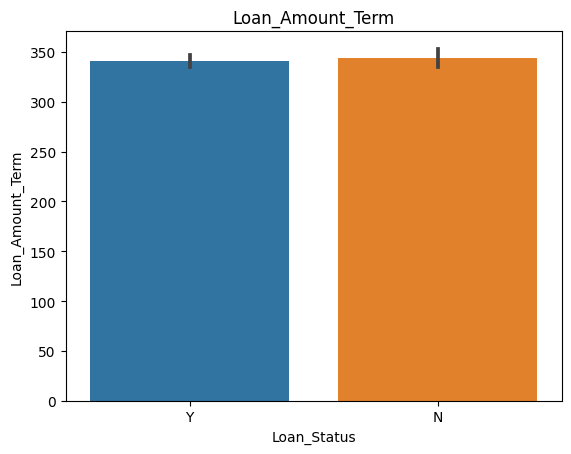

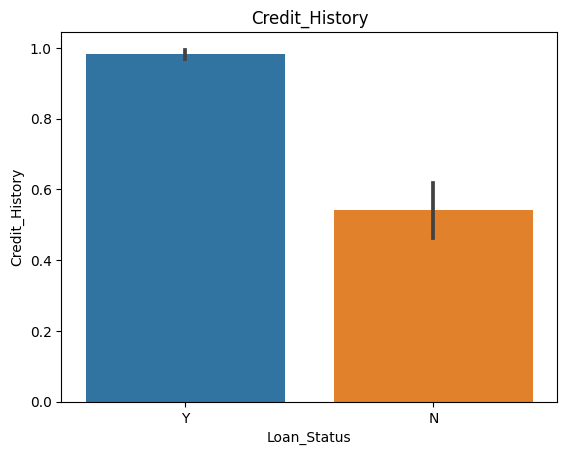

In [10]:
for feature in features_with_na:
    if df[feature].dtype!= 'O':
        sns.barplot(x=df['Loan_Status'], y= df[feature])
        plt.title(feature)
        plt.show()

There is a relationship between some of the missing value column and the dependent feature. So we need to replace the missing value with something meaningfull.

## Classify into Numerical and Categorical

### Numerical variable

In [11]:
# finding numerical variable
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [12]:
df[numerical_features].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In the CoapplicantIncome column, there is 0 in some rows. So that can be also consider as a NaN value. So need to change it to NaN and handle that also

In [13]:
continoues_features = [feature for feature in numerical_features if len(df[feature].unique()) > 25]

In [14]:
len(continoues_features)

3

In [15]:
continoues_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [16]:
df[continoues_features].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


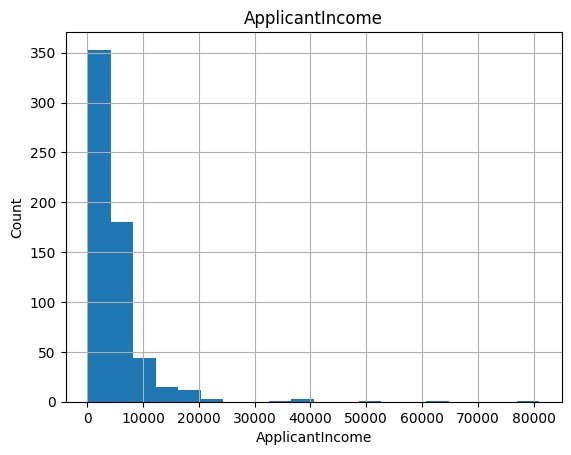

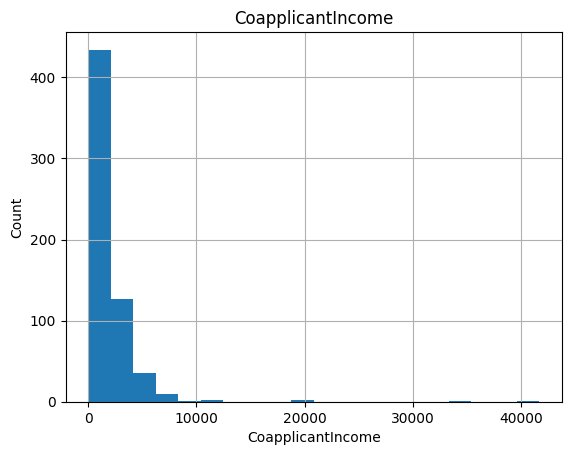

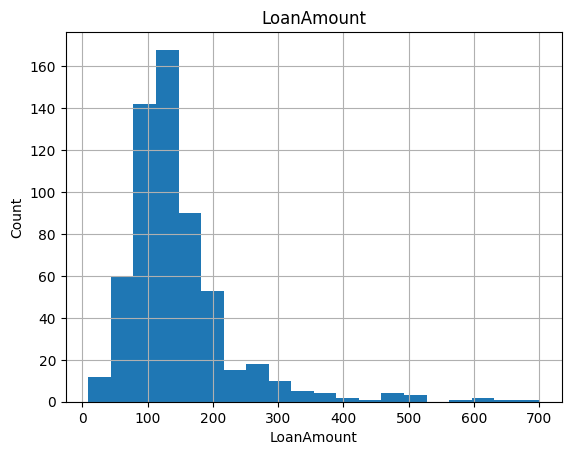

In [17]:
for feature in continoues_features:
    data = df.copy()
       
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

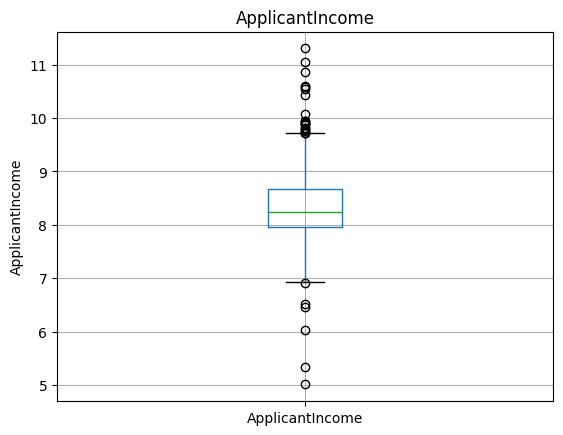

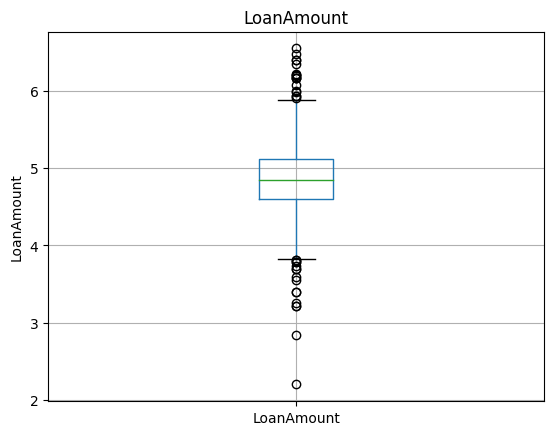

In [18]:
# outliers

for feature in continoues_features:
    data = df.copy()
    
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column= feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [19]:
# categorical features

categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

## Univariate Analysis

#### Categorical variable

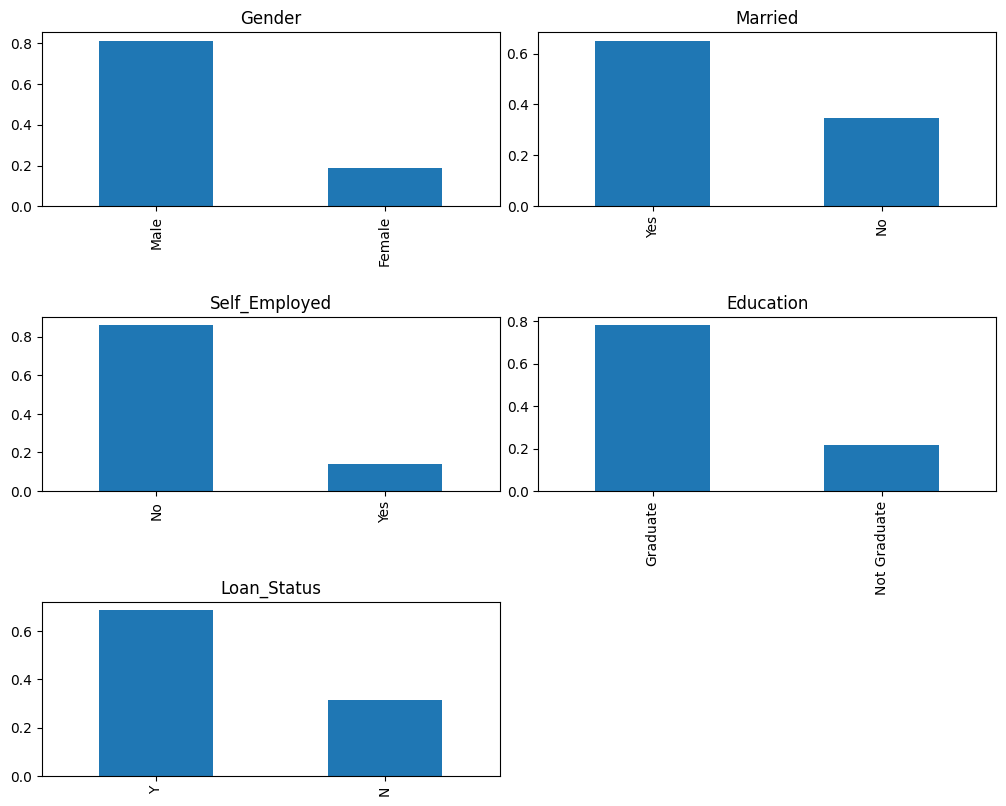

In [20]:
plt.subplot(321)
df.Gender.value_counts(normalize = True).plot(kind = 'bar', title= 'Gender', figsize = (10, 8))
plt.tight_layout(pad=0.5)
plt.subplot(322)
df.Married.value_counts(normalize=True).plot(kind = 'bar', title = "Married")
plt.tight_layout(pad=0.5)                                          
plt.subplot(323)
df.Self_Employed.value_counts(normalize=True).plot(kind = 'bar',title = "Self_Employed")
plt.tight_layout(pad=0.5)                                             
plt.subplot(324)
df.Education.value_counts(normalize=True).plot(kind = 'bar', title = "Education")
plt.tight_layout(pad=0.5)                                          
plt.subplot(325)
df.Loan_Status.value_counts(normalize=True).plot(kind = 'bar',title = "Loan_Status")
plt.tight_layout(pad=0.5)

### Insights :

- 80% of the applicants are male in the training dataset.
- Nearly 70% are married
- Nearly 85-90% of the applicants are self-employed
- About 75% of loan applicants are graduates
- The loan has been approved for more than 65% applicants

#### Ordinal varible

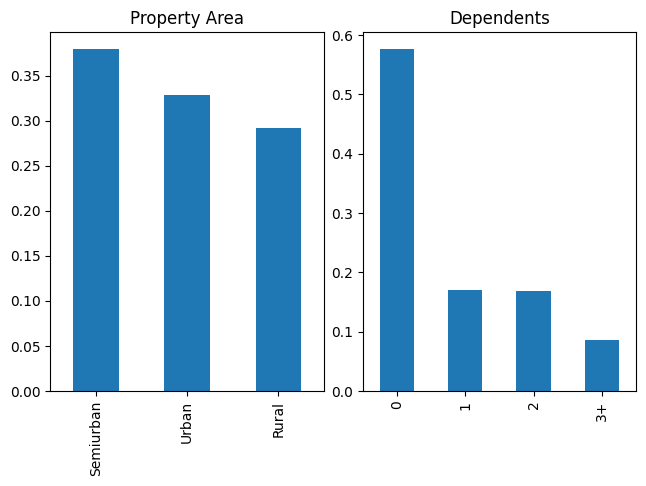

In [21]:
plt.subplot(121)
df.Property_Area.value_counts(normalize = True).plot(kind='bar', title= 'Property Area')
plt.tight_layout(pad=0.5)

plt.subplot(122)
df.Dependents.value_counts(normalize = True).plot(kind='bar', title='Dependents')
plt.tight_layout(pad=0.5)

### Insights:

- Almost 58% of the applicants have no dependents.
- Highest number of applicants are from Semi Urban areas, followed by urban areas.

### Numerical variable

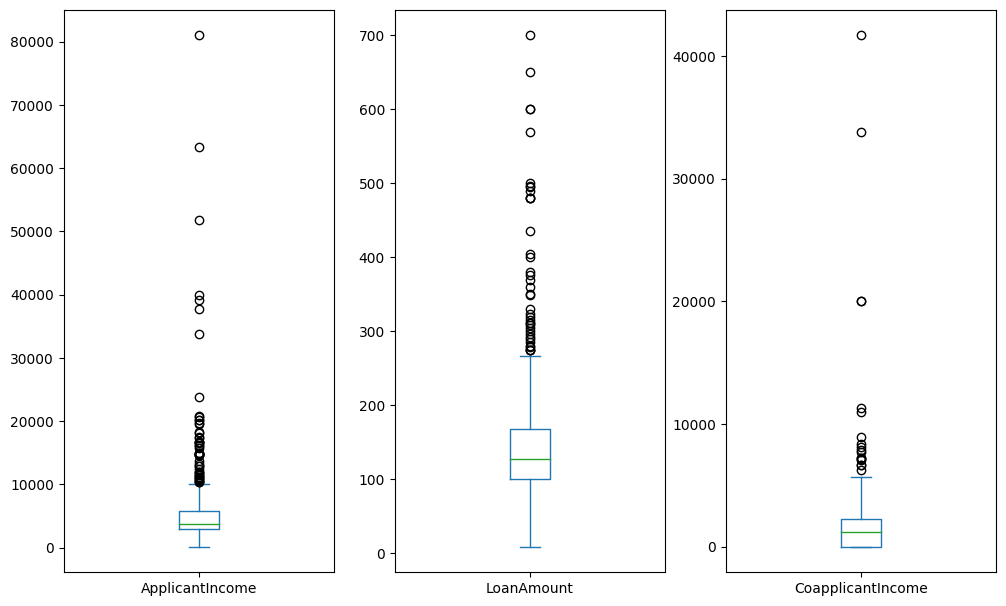

In [22]:
plt.subplot(131)
df['ApplicantIncome'].plot.box(figsize=(10, 6))
plt.tight_layout(pad=0.5)
plt.subplot(132)
df['LoanAmount'].plot.box(figsize=(10, 6))
plt.tight_layout(pad=0.5)
plt.subplot(133)
df['CoapplicantIncome'].plot.box(figsize=(10, 6))
plt.tight_layout(pad=0.5)

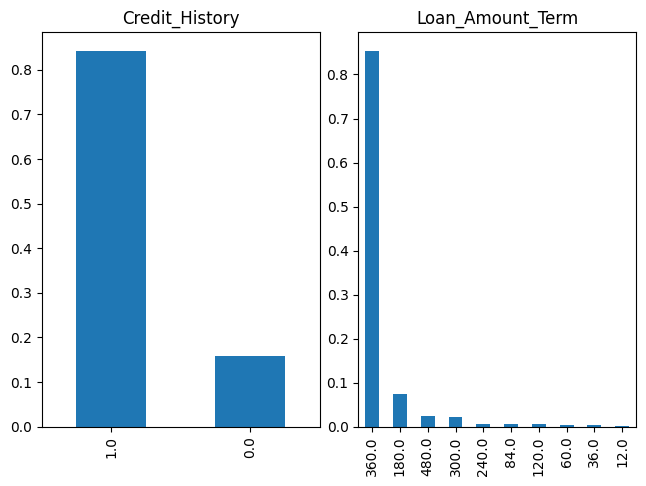

In [23]:
plt.subplot(121)
df.Credit_History.value_counts(normalize = 'True').plot(kind = 'bar', title='Credit_History')
plt.tight_layout(pad=0.5)
plt.subplot(122)
df.Loan_Amount_Term.value_counts(normalize = 'True').plot(kind = 'bar', title='Loan_Amount_Term')
plt.tight_layout(pad=0.5)

### Insights :

- 85% of applicants have a credit history of 1
- Nearly 85% of loans are taken for 360 days.
- The applicantIncome is mostly between 5000–10000 with some outliers.
- CoapplicantIncome is lesser than applicantIncome and is within the 1000–5000, again with some outliers.
- Loan Amount is mostly concentrated between 100–300.

## Bivariate analysis

<AxesSubplot: xlabel='Property_Area', ylabel='count'>

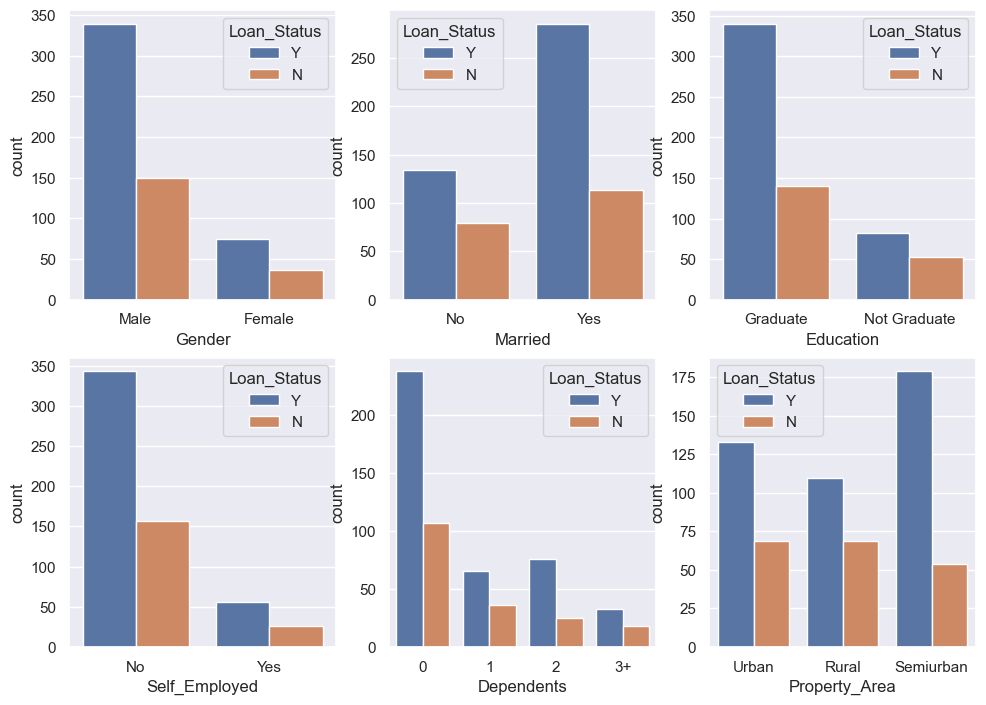

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(231)
sns.countplot(x="Gender", hue='Loan_Status', data=df)
plt.subplot(232)
sns.countplot(x="Married", hue='Loan_Status', data=df)
plt.subplot(233)
sns.countplot(x="Education", hue='Loan_Status', data=df)
plt.subplot(234)
sns.countplot(x="Self_Employed", hue='Loan_Status', data=df)
plt.subplot(235)
sns.countplot(x="Dependents", hue='Loan_Status', data=df)
plt.subplot(236)
sns.countplot(x="Property_Area", hue='Loan_Status', data=df)

### Insights:

- There is not much difference between male and female to approve loan
- Married applicants have a slightly higher chances of loan approval.
- Graduates have higher chance of loan approval compared to non-graduates.
- There is no substantial difference in the loan approval rates for self_employed vs not self_employed.
- Applicants with no dependents or 2 dependents have higher chances of approval. But this does not correlate well.
- Applicants with properties in semi-urban areas have higher loan approval rates.

### Multivariante analysis

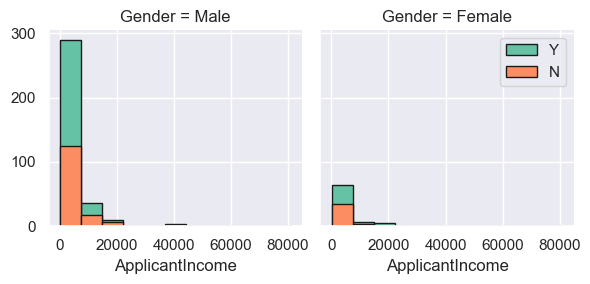

In [25]:
bins = np.linspace(df.ApplicantIncome.min(), df.ApplicantIncome.max(),12)
graph = sns.FacetGrid(df, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'ApplicantIncome', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

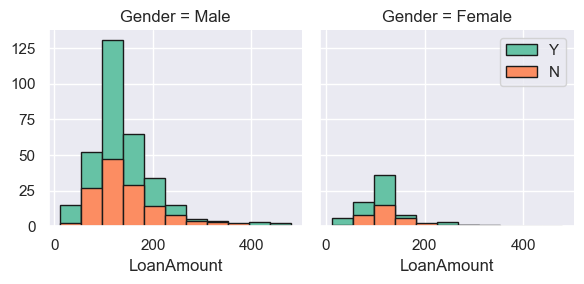

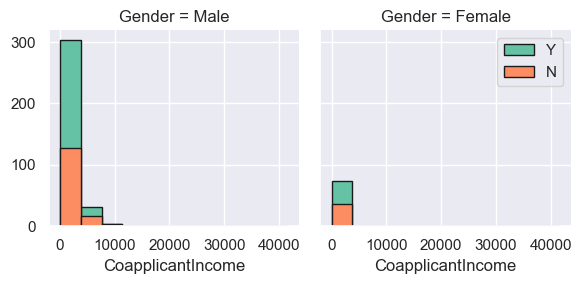

In [26]:
bins = np.linspace(df.Loan_Amount_Term.min(), df.Loan_Amount_Term.max(),12)
graph = sns.FacetGrid(df, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'LoanAmount', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()
bins = np.linspace(df.CoapplicantIncome.min(), df.CoapplicantIncome.max(),12)
graph = sns.FacetGrid(df, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'CoapplicantIncome', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

### Insights :

- Females with income higher than 7000 has higher chances of loan approval
- Females seem to loan lesser amount than men
- The coapplicant income for female candidates is less compared to males. However, it does not reflect much on the loan_status.

In [27]:
correlation_mat = df.corr()

C:\Users\aswan\AppData\Local\Temp\ipykernel_27584\4180852740.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mat = df.corr()


In [28]:
correlation_mat

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


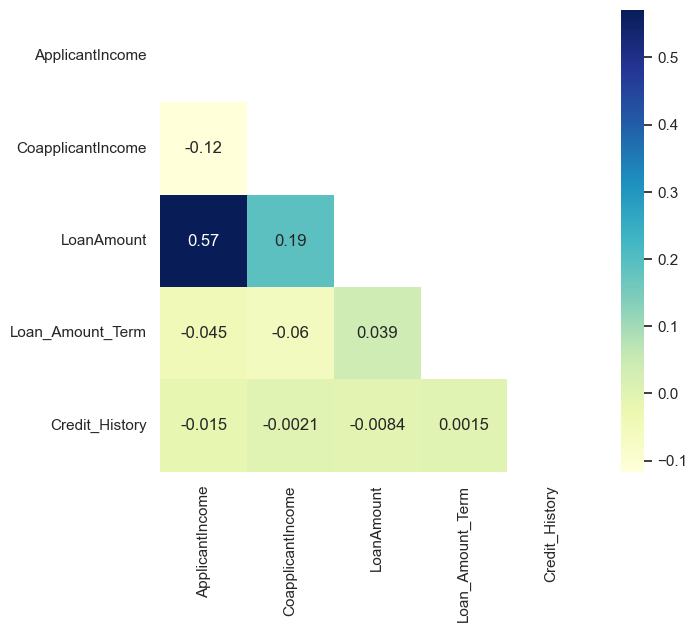

In [29]:
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,6))
    ax = sns.heatmap(correlation_mat,
mask=mask,annot=True,cmap="YlGnBu")

### Insights :

- There is a positive correlation between ApplicantIncome and LoanAmount, CoapplicantIncome and LoanAmount.